In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Sales_Data.xlsx')
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,13,13,29,25,19,15,10,1287.50,1054.15,2842.52,2133.79,2051.94,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,11,13,10,13,14,10,11,1253.08,2003.25,1819.75,1114.83,1791.86,1624.34,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,5,4,3,5,5,8,13,698.95,504.97,197.97,1182.97,733.96,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,10,8,5,8,5,3,5,1753.95,1400.23,570.48,1154.06,798.07,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,2,3,8,8,12,10,12,150.98,330.38,1090.23,563.63,1339.44,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


## Data Analysis and Cleaning

In [3]:
# Getting the shape of Dataframe
df.shape

(5000, 40)

In [4]:
# Checking for the Datatypes and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

In [5]:
# Checking for Duplicate Records
df.duplicated().any()

False

In [6]:
# Getting Statistic Information of Features 
df.describe()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,1.75440,1.798000,2.134000,1.94620,1.683400,1.925400,215.208336,233.510430,235.689294,265.949796,250.580554,219.64210,260.943330,2.99780,3.062600,3.230000,3.580000,378.638346,406.595734,421.826908,474.462852,1.028800,3.746200,4.434000,3.661400,131.062636,486.863868,584.731626,478.865710
std,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,2.43394,2.464875,2.468048,2.65268,2.449972,2.315018,397.831999,411.941787,397.858311,383.890024,400.543113,376.13976,406.926075,3.25698,3.792461,3.921043,3.970384,515.590218,619.413277,643.449120,617.579321,2.174331,4.700234,5.044793,4.581894,331.289349,789.029911,804.290026,743.244248
min,1.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000,0.000000,0.000000,1.000000,63.990000,0.000000,0.000000,80.000000,0.000000,1.000000,1.000000,1.000000,0.000000,35.000000,89.990000,1.000000
50%,13765.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,74.990000,75.990000,80.990000,144.590000,91.195000,62.41500,135.990000,2.00000,2.000000,2.000000,2.000000,190.985000,183.925000,194.990000,264.485000,0.000000,2.000000,3.000000,2.000000,0.000000,236.440000,299.840000,208.990000
75%,71891.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,286.865000,310.972500,319.992500,344.357500,352.740000,297.28000,341.367500,4.00000,5.000000,5.000000,5.000000,513.012500,553.462500,604.085000,651.487500,1.000000,6.000000,7.000000,5.000000,131.282500,661.952500,797.032500,620.117500
max,277160.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,23.00000,29.000000,32.000000,26.00000,31.000000,23.000000,12819.410000,7853.920000,5877.440000,6434.950000,6855.220000,4642.97000,8366.350000,32.00000,42.000000,37.000000,53.000000,8143.650000,11303.890000,12946.220000,8274.970000,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000


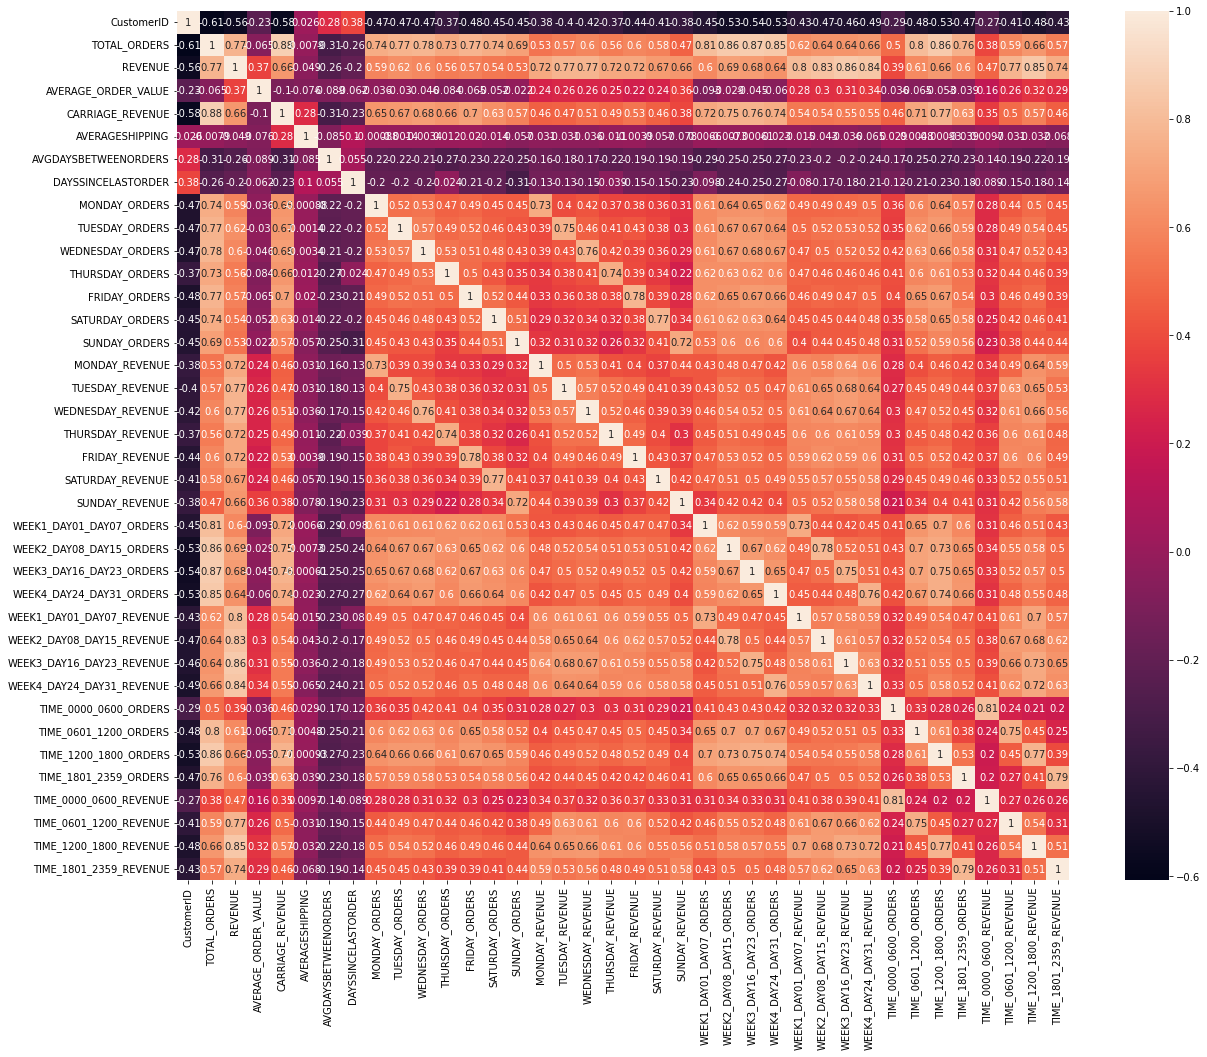

In [7]:
plt.figure(figsize=(20,16))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [8]:
sns.set(font_scale = 1.5)

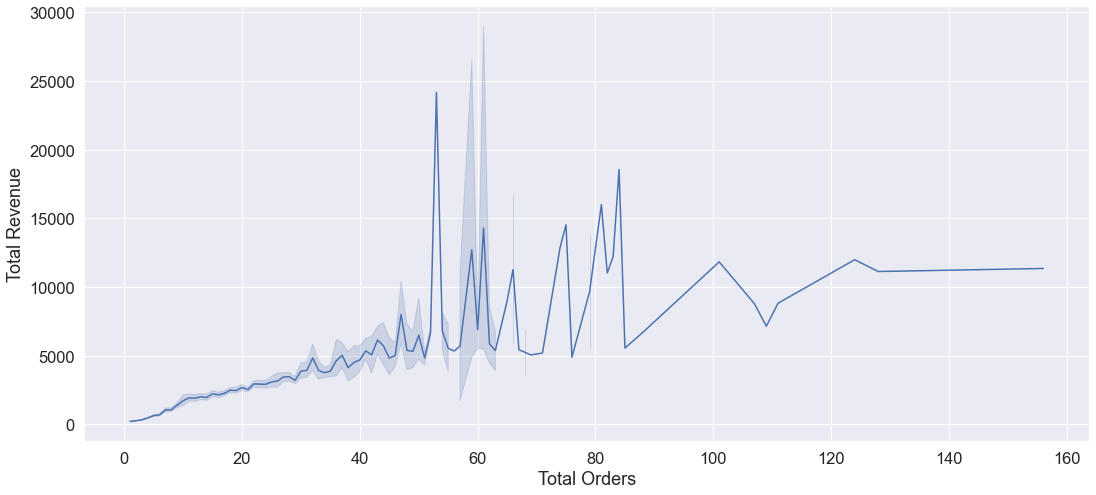

In [126]:
plt.figure(figsize=(18,8))
plt.xlabel('Total Orders')
plt.ylabel('Total Revenue')
sns.lineplot(x='TOTAL_ORDERS', y='REVENUE', data = df)

plt.show(   )

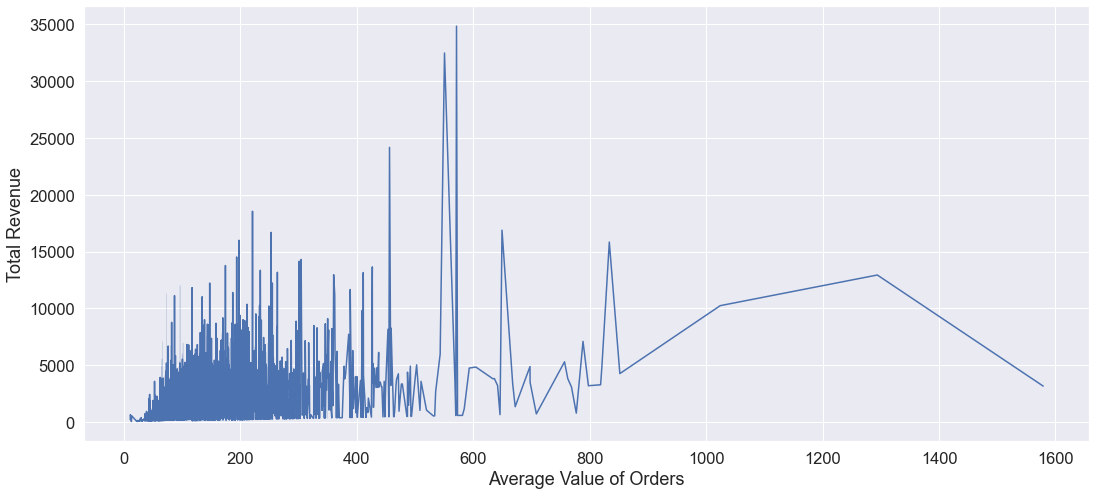

In [127]:
plt.figure(figsize=(18,8))
plt.xlabel('Average Value of Orders')
plt.ylabel('Total Revenue')
sns.lineplot(x='AVERAGE_ORDER_VALUE', y='REVENUE', data = df)
plt.show(   )

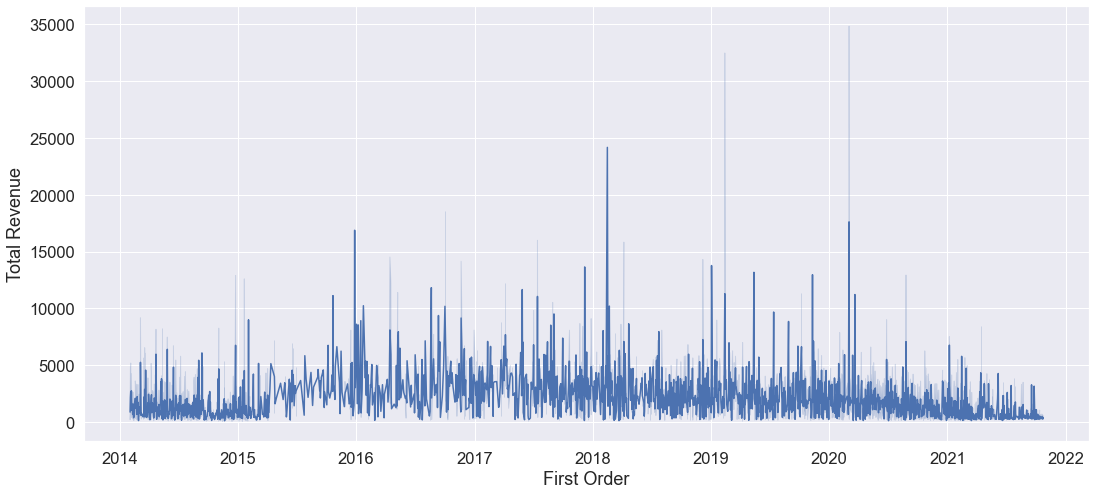

In [128]:
plt.figure(figsize=(18,8))
plt.xlabel('First Order')
plt.ylabel('Total Revenue')
sns.lineplot(x='FIRST_ORDER_DATE', y='REVENUE', data = df)
plt.show(   )

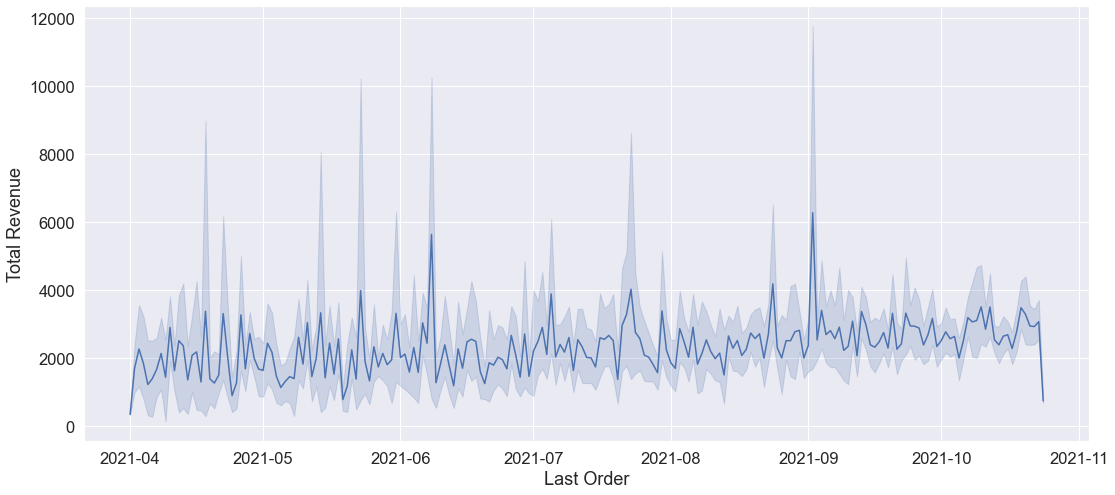

In [129]:
plt.figure(figsize=(18,8))
plt.xlabel('Last Order')
plt.ylabel('Total Revenue')
sns.lineplot(x='LATEST_ORDER_DATE', y='REVENUE', data = df)
plt.show(   )

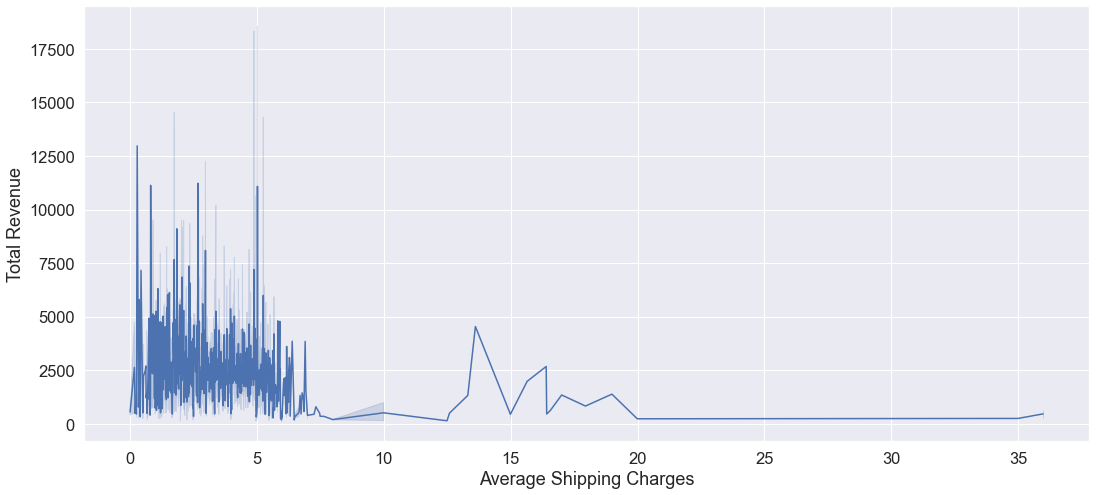

In [130]:
plt.figure(figsize=(18,8))
plt.xlabel('Average Shipping Charges')
plt.ylabel('Total Revenue')
sns.lineplot(x='AVERAGESHIPPING', y='REVENUE', data = df)
plt.show(   )

In [131]:
df[df['AVERAGESHIPPING'] >= 2]

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,PRODUCT_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,13,13,29,25,19,15,10,1287.50,1054.15,2842.52,2133.79,2051.94,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44,11456.95
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,5,4,3,5,5,8,13,698.95,504.97,197.97,1182.97,733.96,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80,7088.00
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,10,8,5,8,5,3,5,1753.95,1400.23,570.48,1154.06,798.07,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23,6899.45
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,2,3,8,8,12,10,12,150.98,330.38,1090.23,563.63,1339.44,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50,6084.40
6,187,43,5470.27,127.22,128.77,2.99,2019-01-14,2021-10-24,23.58,1,5,6,3,3,11,7,8,395.70,964.58,588.98,798.97,1175.54,517.87,1028.63,3,2,16,22,611.49,117.00,2042.31,2699.47,2,0,19,22,47.00,0.00,2578.28,2844.99,5341.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49,112.50
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49,112.50
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49,112.50
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,1,0,0.00,0.00,117.49,0.00,112.50


In [132]:
df['PRODUCT_REVENUE'] = df['REVENUE']-df['CARRIAGE_REVENUE']

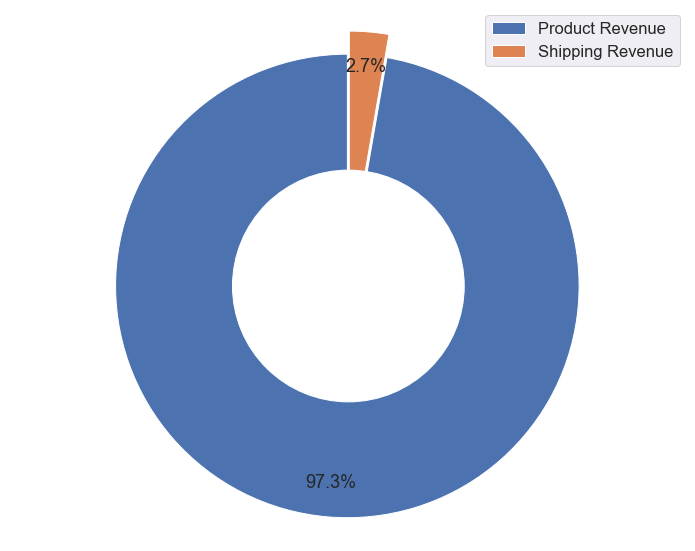

In [133]:
labels = ['Product Revenue', 'Shipping Revenue']
sizes = df[['PRODUCT_REVENUE','CARRIAGE_REVENUE']].sum()

explode = (0.05,0.05)

fig1, ax1 = plt.subplots(figsize=(10,8))
 
plt.pie(sizes.values.flatten(), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,-0.05),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.legend(labels = labels)
plt.tight_layout()
plt.show()

In [134]:
# Day of week with Lowest to Highest numbers of Orders
df[['MONDAY_ORDERS','TUESDAY_ORDERS','WEDNESDAY_ORDERS','THURSDAY_ORDERS','FRIDAY_ORDERS','SATURDAY_ORDERS','SUNDAY_ORDERS',]].sum().sort_values()

MONDAY_ORDERS        8145
SATURDAY_ORDERS      8417
TUESDAY_ORDERS       8772
WEDNESDAY_ORDERS     8990
SUNDAY_ORDERS        9627
FRIDAY_ORDERS        9731
THURSDAY_ORDERS     10670
dtype: int64

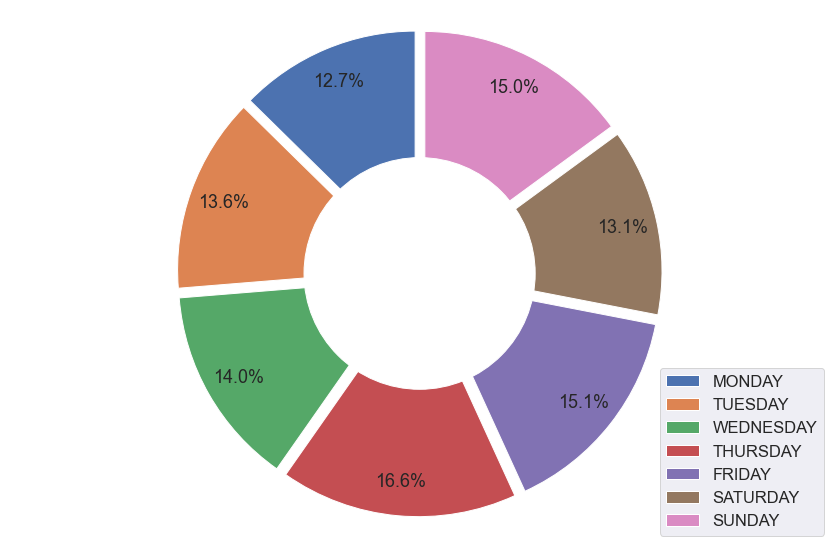

In [135]:
# Pie chart
labels = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY','FRIDAY','SATURDAY','SUNDAY']
sizes = df[['MONDAY_ORDERS','TUESDAY_ORDERS','WEDNESDAY_ORDERS','THURSDAY_ORDERS','FRIDAY_ORDERS','SATURDAY_ORDERS','SUNDAY_ORDERS']].sum()

explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots(figsize=(12,8))
 
plt.pie(sizes.values.flatten(), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.legend(labels = labels)
plt.tight_layout()
plt.show()

In [136]:
# Day of week with Lowest to Highest Revenue
df[['MONDAY_REVENUE','TUESDAY_REVENUE','WEDNESDAY_REVENUE','THURSDAY_REVENUE','FRIDAY_REVENUE','SATURDAY_REVENUE','SUNDAY_REVENUE',]].sum().sort_values()

MONDAY_REVENUE       1076041.68
SATURDAY_REVENUE     1098210.50
TUESDAY_REVENUE      1167552.15
WEDNESDAY_REVENUE    1178446.47
FRIDAY_REVENUE       1252902.77
SUNDAY_REVENUE       1304716.65
THURSDAY_REVENUE     1329748.98
dtype: float64

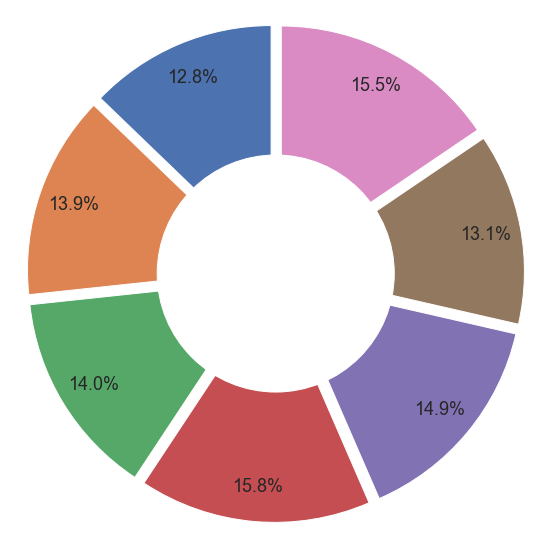

In [137]:
# Pie chart
labels = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY','FRIDAY','SATURDAY','SUNDAY']
sizes = df[['MONDAY_REVENUE','TUESDAY_REVENUE','WEDNESDAY_REVENUE','THURSDAY_REVENUE','FRIDAY_REVENUE','SATURDAY_REVENUE','SUNDAY_REVENUE']].sum()

explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots(figsize=(8,8))
 
plt.pie(sizes.values.flatten(), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
# ax1.legend(labels = labels)
plt.tight_layout()
plt.show()

In [138]:
# Week with Lowest to Highest number of Orders
df[['WEEK1_DAY01_DAY07_ORDERS','WEEK2_DAY08_DAY15_ORDERS','WEEK3_DAY16_DAY23_ORDERS','WEEK4_DAY24_DAY31_ORDERS']].sum().sort_values()

WEEK1_DAY01_DAY07_ORDERS    14989
WEEK2_DAY08_DAY15_ORDERS    15313
WEEK3_DAY16_DAY23_ORDERS    16150
WEEK4_DAY24_DAY31_ORDERS    17900
dtype: int64

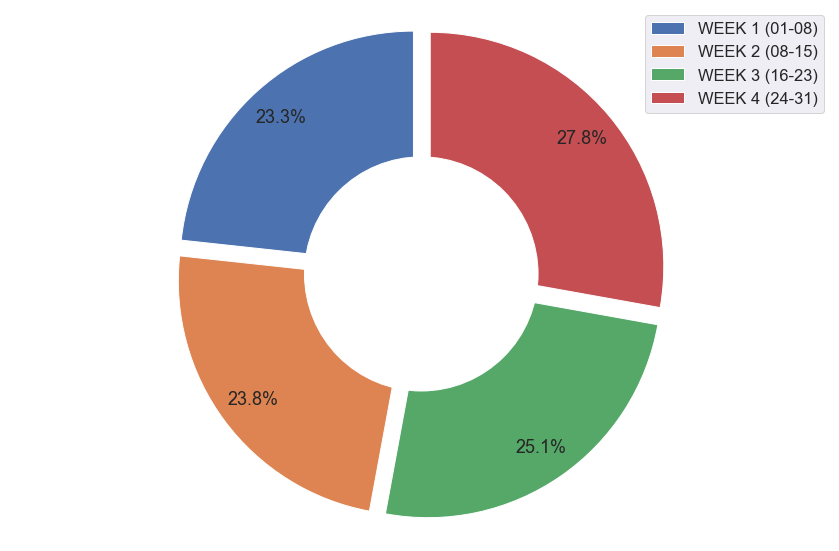

In [139]:
# Pie chart
labels = ['WEEK 1 (01-08)', 'WEEK 2 (08-15)', 'WEEK 3 (16-23)', 'WEEK 4 (24-31)']
sizes = df[['WEEK1_DAY01_DAY07_ORDERS','WEEK2_DAY08_DAY15_ORDERS','WEEK3_DAY16_DAY23_ORDERS','WEEK4_DAY24_DAY31_ORDERS']].sum()

explode = (0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots(figsize=(12,8))
 
plt.pie(sizes.values.flatten(), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.legend(labels = labels)
plt.tight_layout()
plt.show()

In [140]:
# Week with Lowest to Highest Revenue
df[['WEEK1_DAY01_DAY07_REVENUE','WEEK2_DAY08_DAY15_REVENUE','WEEK3_DAY16_DAY23_REVENUE','WEEK4_DAY24_DAY31_REVENUE']].sum().sort_values()

WEEK1_DAY01_DAY07_REVENUE    1893191.73
WEEK2_DAY08_DAY15_REVENUE    2032978.67
WEEK3_DAY16_DAY23_REVENUE    2109134.54
WEEK4_DAY24_DAY31_REVENUE    2372314.26
dtype: float64

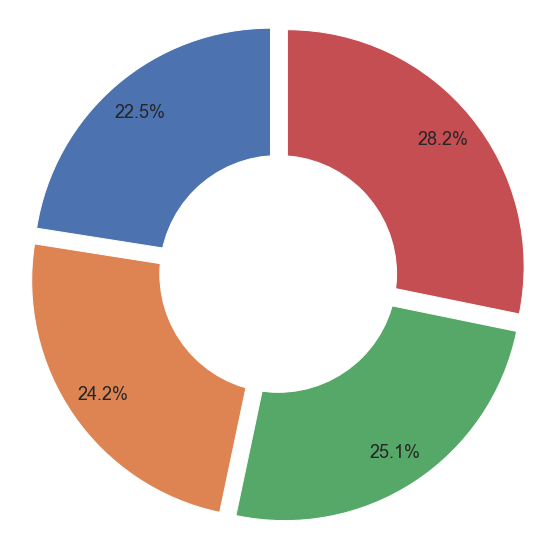

In [141]:
labels = ['WEEK 1 (01-08)', 'WEEK 2 (08-15)', 'WEEK 3 (16-23)', 'WEEK 4 (24-31)']
sizes = df[['WEEK1_DAY01_DAY07_REVENUE','WEEK2_DAY08_DAY15_REVENUE','WEEK3_DAY16_DAY23_REVENUE','WEEK4_DAY24_DAY31_REVENUE']].sum()

explode = (0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots(figsize=(8,8))
 
plt.pie(sizes.values.flatten(), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
# ax1.legend(labels = labels)
plt.tight_layout()
plt.show()

In [142]:
# Quarter of Day with Lowest to Highest number of Orders
df[['TIME_0000_0600_ORDERS','TIME_0601_1200_ORDERS','TIME_1200_1800_ORDERS','TIME_1801_2359_ORDERS']].sum().sort_values()

TIME_0000_0600_ORDERS     5144
TIME_1801_2359_ORDERS    18307
TIME_0601_1200_ORDERS    18731
TIME_1200_1800_ORDERS    22170
dtype: int64

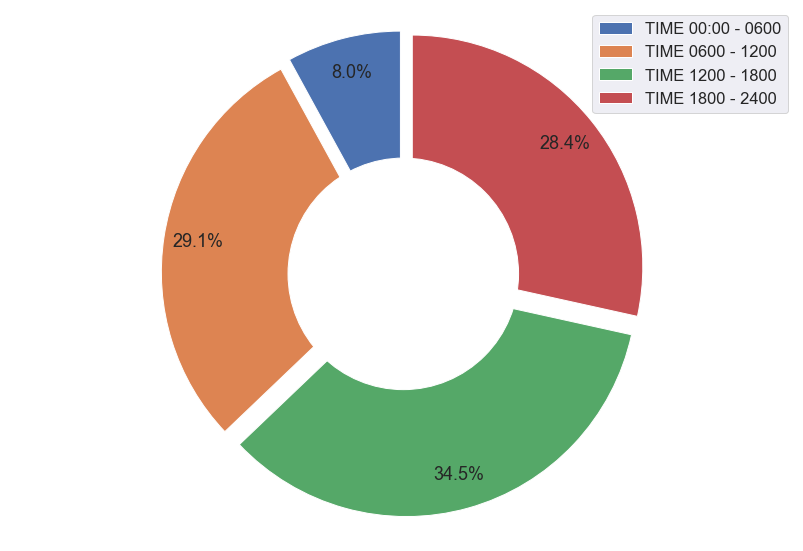

In [146]:
# Pie chart
labels = ['TIME 00:00 - 0600', 'TIME 0600 - 1200', 'TIME 1200 - 1800', 'TIME 1800 - 2400']
sizes = df[['TIME_0000_0600_ORDERS','TIME_0601_1200_ORDERS','TIME_1200_1800_ORDERS','TIME_1801_2359_ORDERS']].sum()

explode = (0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots(figsize=(11.5,8))
 
plt.pie(sizes.values.flatten(), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.legend(labels = labels, loc = 'upper right')
plt.tight_layout()
plt.show()

In [144]:
# Quarter of Day with Lowest to Highest Revenue
df[['TIME_0000_0600_REVENUE','TIME_0601_1200_REVENUE','TIME_1200_1800_REVENUE','TIME_1801_2359_REVENUE']].sum().sort_values()

TIME_0000_0600_REVENUE     655313.18
TIME_1801_2359_REVENUE    2394328.55
TIME_0601_1200_REVENUE    2434319.34
TIME_1200_1800_REVENUE    2923658.13
dtype: float64

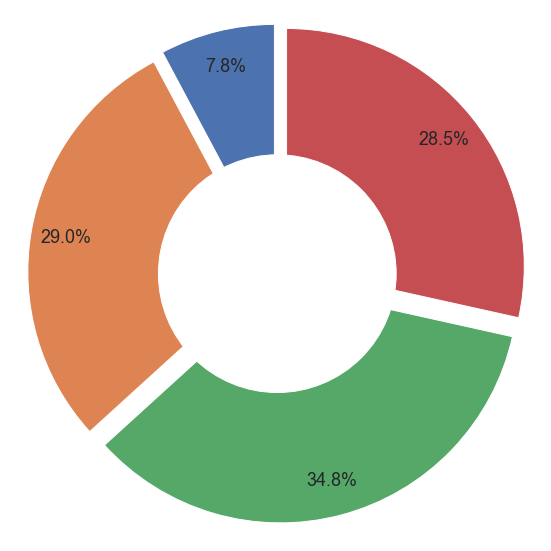

In [145]:
# Pie chart
labels = ['TIME_Q1', 'TIME_Q2', 'TIME_Q3', 'TIME_Q4']
sizes = df[['TIME_0000_0600_REVENUE','TIME_0601_1200_REVENUE','TIME_1200_1800_REVENUE','TIME_1801_2359_REVENUE']].sum()

explode = (0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots(figsize=(8,8))
 
plt.pie(sizes.values.flatten(), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
# ax1.legend(labels = labels)
plt.tight_layout()
plt.show()